(75, 3)


<ipython-input-4-200543f79bd0>:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


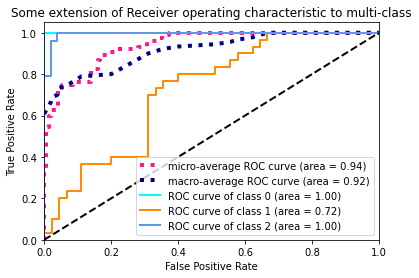

In [4]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])
# 设置种类
n_classes = y.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(y_test.shape)
#print(y_test)
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [5]:
import os.path
from os import path
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

smaple='5m'
data_file='allData_resample_'+smaple
#allData_resample_15m
pre_targets='floor_no'#'location_no'#

df=pd.read_csv('DB/new_data/'+data_file+'.csv')

# location_floor_map = {'ElevatorHall1F': 2, 'ElevatorHallB2F':0, 'ElevatorHall3F':4, 'CorridorB1F':1,
#  'Corridor1F':2, 'Corridor3F':4,'Corridor2F':3, 'ElevatorHall2F':3, 'CorridorB2F':0,
#  'ElevatorHallB1F':1}
# df['floor_no'] = df['location'].map(location_floor_map)
df

,location,new_tsp,temperature,humidity,pressure,light,weekday,quarter,month,hour,day,location_no,floor_no
0,Corridor1F,2019-07-07 15:55:00,24.000000,66.000000,1006.945919,18.817795,7,3,7,15,7,6,2
1,Corridor1F,2019-07-07 16:00:00,24.000000,65.500000,1006.839727,14.335644,7,3,7,16,7,6,2
2,Corridor1F,2019-07-07 16:05:00,24.200000,65.000000,1007.066550,13.837628,7,3,7,16,7,6,2
3,Corridor1F,2019-07-07 16:10:00,24.250000,65.000000,1007.270691,13.710509,7,3,7,16,7,6,2
4,Corridor1F,2019-07-07 16:15:00,24.800000,64.800000,1007.474832,5.826891,7,3,7,16,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268671,ElevatorHallB2F,2020-12-12 23:35:00,23.211093,33.205041,1008.289949,751.277457,6,4,12,23,12,1,0
268672,ElevatorHallB2F,2020-12-12 23:40:00,23.134940,33.351574,1008.338998,751.277457,6,4,12,23,12,1,0
268673,ElevatorHallB2F,2020-12-12 23:45:00,23.097471,33.473936,1008.456751,751.277457,6,4,12,23,12,1,0
268674,ElevatorHallB2F,2020-12-12 23:50:00,23.065447,33.427742,1008.387423,751.277457,6,4,12,23,12,1,0


In [6]:
targets = df[pre_targets]
features =df.drop(columns={'location','location_no','floor_no','light'})

# Split into 70% training and 30% testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size = 0.3, random_state = 42)


model_type="sk"
resultfilename=model_type+'_'+data_file+'_'+pre_targets
print(resultfilename)
filepath='DB/result/'+resultfilename+'.csv'
print(filepath)
if path.exists(filepath):
    print('yes')
    result_pd=pd.read_csv(filepath)
else: 
    print('file not extis')
    result_pd=pd.DataFrame()


# train_features=cudf.read_csv('DB/floor_data/training_features.csv')
# test_features=cudf.read_csv('DB/floor_data/testing_features.csv')
# train_labels=cudf.read_csv('DB/floor_data/training_labels.csv')
# test_labels=cudf.read_csv('DB/floor_data/testing_labels.csv')

# train_features=pd.read_csv('DB/new_data/training_features.csv')
# test_features=pd.read_csv('DB/new_data/testing_features.csv')
# train_labels=pd.read_csv('DB/new_data/training_labels.csv')
# test_labels=pd.read_csv('DB/new_data/testing_labels.csv')

# #no_location =pd.read_csv('DB/data_fill/no_location.csv')
# train_features=pd.read_csv('DB/data_fill/training_features.csv')
# test_features=pd.read_csv('DB/data_fill/testing_features.csv')
# train_labels=pd.read_csv('DB/data_fill/training_labels.csv')
# test_labels=pd.read_csv('DB/data_fill/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)
print(np.unique(train_labels))
print(pd.value_counts(test_labels.values))

print(test_labels.isnull().sum())
result_pd['origin']=test_labels.values

print(train_features.columns.values)

sk_allData_resample_5m_floor_no
DB/result/sk_allData_resample_5m_floor_no.csv
yes
Training Feature Size:  (188073, 9)
Testing Feature Size:   (80603, 9)
Training Labels Size:   (188073,)
Testing Labels Size:    (80603,)
[0 1 2 3 4]
4    22243
0    17329
2    16826
3    14641
1     9564
dtype: int64
0
['new_tsp' 'temperature' 'humidity' 'pressure' 'weekday' 'quarter' 'month'
 'hour' 'day']


In [7]:
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features.drop('new_tsp', axis=1))

# Transform both training data and testing data
X = imputer.transform(train_features.drop('new_tsp', axis=1))
X_test = imputer.transform(test_features.drop('new_tsp', axis=1))
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X_train = scaler.transform(X)
X_test = scaler.transform(X_test)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [9]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import OneHotEncoder


# 加载数据
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# 将标签二值化
#y_test = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
# 设置种类
#n_classes = y.shape[1]
print(n_classes)
# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
print(n_samples, n_features)

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

3
188073 8


3
y_test shape: (80603,)
y_score shape: (80603, 5)
y_test shape: (80603, 5)
0
1
2
3
4


<ipython-input-10-e980134ec76f>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


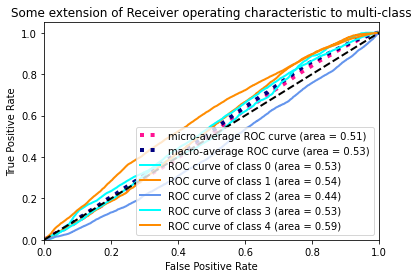

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()

print(n_classes)
print('y_test shape:', y_test.shape)
print('y_score shape:',y_score.shape)
# 计算每一类的ROC
encoder = OneHotEncoder(sparse=False)
# transform data
#y_test = encoder.fit_transform(y_test.reshape(-1,1))
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test.shape[1]

print('y_test shape:', y_test.shape)
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,GradientBoostingClassifier, AdaBoostClassifier

t0 = time()
model = RandomForestRegressor()

#adb_pred= fit_and_predict(adb,'adb_sk')

# Make predictions and evalute
y_score = model.fit(X_train, y_train).decision_function(X_test)
print("y_score shape:", y_score.shape)
#model_pred = model.predict(X_test)decision_function(X_test)
#model_pred=pro_pred(model_pred)

y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test.shape[1]

print('y_test shape:', y_test.shape)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

AttributeError: 'RandomForestRegressor' object has no attribute 'decision_function'

In [ ]:
print(fpr)

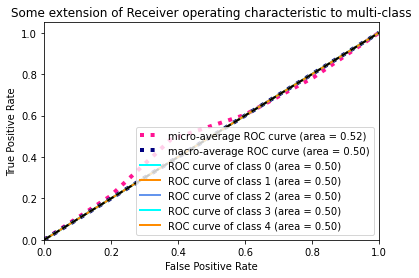

In [92]:
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


ValueError: AdaBoostClassifier should be a binary classifier

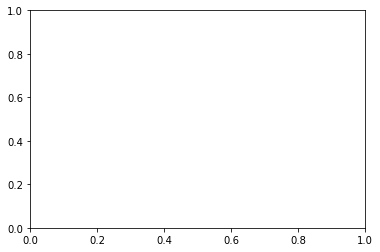

In [102]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X, y = X[y != 2], y[y != 2]

n_samples, n_features = X_train.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X_train, random_state.randn(n_samples, 200 * n_features)]
y=y_train

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)


classifier= AdaBoostClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()